# Regression using Linear Regression

**In this exercise we have to predict the number of persons that used a bicycle from all the available numeric features, by working on the 'Bike Sharing in Washington D.C.' dataset**

**Connect to GDrive**

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**Load the libraries**

In [41]:
from sklearn.linear_model import SGDRegressor
from io import StringIO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

**Load the dataset**

In [42]:
dataset=pd.read_csv('/content/gdrive/MyDrive/day.csv')
df=pd.DataFrame(data=dataset)

In [43]:
# Change columns to be more readable
df=df.rename(columns={"dteday": "date", "yr": "year", "mnth": "month", "weekday": "day_of_the_week", "workingday": "working_day",
                      "weathersit": "weather_situation", "temp": "real_temperature", "atemp": "feeling_temperature",
                      "hum": "humidity", "windspeed": "wind_speed", "cnt": "num_of_bikes"})

# Feature Engineering

**Remove unwanted columns**

In [44]:
# Keep only numeric data
df = df.drop(['instant','date','season','year','month','holiday','day_of_the_week','working_day','weather_situation','casual','registered'],axis=1)

**Final Dataset**

In [45]:
df

,real_temperature,feeling_temperature,humidity,wind_speed,num_of_bikes
0,0.344167,0.363625,0.805833,0.160446,985
1,0.363478,0.353739,0.696087,0.248539,801
2,0.196364,0.189405,0.437273,0.248309,1349
3,0.200000,0.212122,0.590435,0.160296,1562
4,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,2114
727,0.253333,0.255046,0.590000,0.155471,3095
728,0.253333,0.242400,0.752917,0.124383,1341
729,0.255833,0.231700,0.483333,0.350754,1796


# Model Training

**Split dataset into features and target labels**

In [46]:
X_train = df.drop(['num_of_bikes'], axis = 1)
Y_train = df['num_of_bikes']

**1. Stochastic Gradient Descent Regressor - multilinear regression**

In [61]:
#Save output to a string variable, to manipulate it accordingly
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

1. Experiment 1 (learning rate a = 0.001)

In [48]:
learning_rate = 0.001
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1, average=False, random_state=2000, verbose=1)

In [49]:
p_sum = [];
coef_list=[];
epochs = 15;
for epoch in range(epochs):
    model = sgd.partial_fit(X_train, Y_train)
    Y_predict = model.predict(X_train)
    coef_list.append(model.coef_.tolist())
    print(model.coef_)
    p_sum.append(np.sum(Y_train-Y_predict))
    print(Y_predict, Y_train, np.sum(Y_train-Y_predict))

In [50]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if (len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

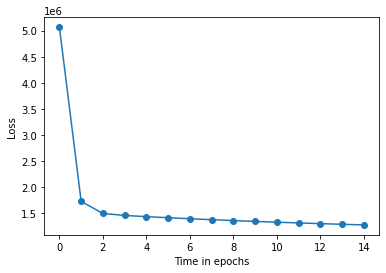

In [51]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

2.   Experiment 2 (learning rate a = 0.01)

In [53]:
learning_rate = 0.01
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1, average=False, random_state=2000, verbose=1)

In [54]:
p_sum = [];
coef_list=[];
epochs = 15;
for epoch in range(epochs):
    model = sgd.partial_fit(X_train, Y_train)
    Y_predict = model.predict(X_train)
    coef_list.append(model.coef_.tolist())
    print(model.coef_)
    p_sum.append(np.sum(Y_train-Y_predict))
    print(Y_predict, Y_train, np.sum(Y_train-Y_predict))

In [55]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if (len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

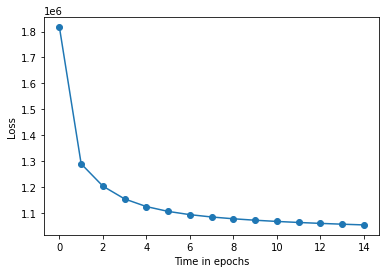

In [56]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

3.   Experiment 3 (learning rate a = 0.1)

In [62]:
learning_rate = 0.1
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1, average=False, random_state=2000, verbose=1)

In [63]:
p_sum = [];
coef_list=[];
epochs = 15;
for epoch in range(epochs):
    model = sgd.partial_fit(X_train, Y_train)
    Y_predict = model.predict(X_train)
    coef_list.append(model.coef_.tolist())
    print(model.coef_)
    p_sum.append(np.sum(Y_train-Y_predict))
    print(Y_predict, Y_train, np.sum(Y_train-Y_predict))

In [64]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if (len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

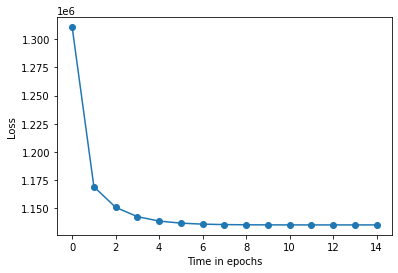

In [65]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

**Conclusions**

*By choosing the learning rate to be a = 0.1, we have the optimal hyperparameter. This is because for each epoch - thus iteration the loss of the cost function has the minimum possible value, and the model seems to have learned the weights well*

**2. Stochastic Gradient Descent Regressor - linear regression**

*We choose 'feeling_temperature' as the most prominent feature of the numeric columns and only one instance*

In [160]:
X_train = df[['feeling_temperature']]
Y_train = df['num_of_bikes']
X_train = X_train[:1].values
Y_train = Y_train[:1].values

In [161]:
#Save output to a string variable, to manipulate it accordingly
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

*1.   Experiment 1 (learning rate a = 0.001)*

In [148]:
learning_rate = 0.001
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1, average=False, random_state=2000, verbose=1)

In [149]:
p_sum = [];
coef_list=[];
epochs = 15;
for epoch in range(epochs):
    model = sgd.partial_fit(X_train, Y_train)
    Y_predict = model.predict(X_train)
    coef_list.append(model.coef_.tolist())
    print(model.coef_)
    p_sum.append(np.sum(Y_train-Y_predict))
    print(Y_predict, Y_train, np.sum(Y_train-Y_predict))

In [150]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if (len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

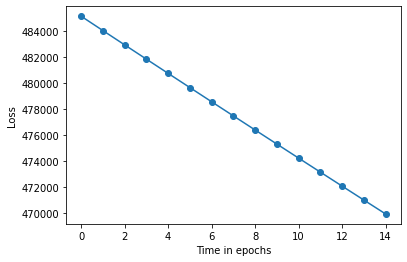

In [151]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

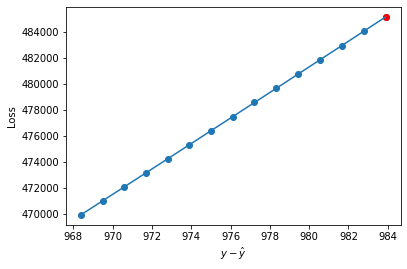

In [152]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()

2. Experiment 2 (learning rate a = 0.01)

In [155]:
learning_rate = 0.01
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1, average=False, random_state=2000, verbose=1)

In [156]:
p_sum = [];
coef_list=[];
epochs = 15;
for epoch in range(epochs):
    model = sgd.partial_fit(X_train, Y_train)
    Y_predict = model.predict(X_train)
    coef_list.append(model.coef_.tolist())
    print(model.coef_)
    p_sum.append(np.sum(Y_train-Y_predict))
    print(Y_predict, Y_train, np.sum(Y_train-Y_predict))

In [157]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if (len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

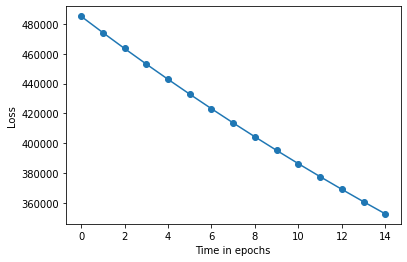

In [158]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

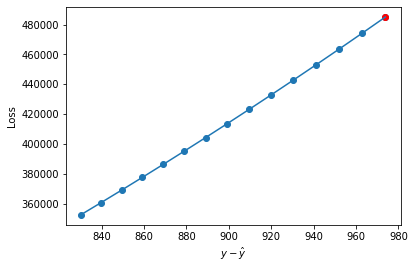

In [159]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()

3. Experiment 3 (learning rate a = 0.1)

In [162]:
learning_rate = 0.1
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1, average=False, random_state=2000, verbose=1)

In [163]:
p_sum = [];
coef_list=[];
epochs = 15;
for epoch in range(epochs):
    model = sgd.partial_fit(X_train, Y_train)
    Y_predict = model.predict(X_train)
    coef_list.append(model.coef_.tolist())
    print(model.coef_)
    p_sum.append(np.sum(Y_train-Y_predict))
    print(Y_predict, Y_train, np.sum(Y_train-Y_predict))

In [164]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if (len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

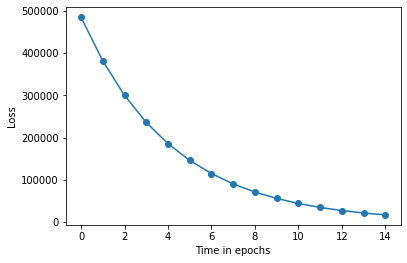

In [165]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

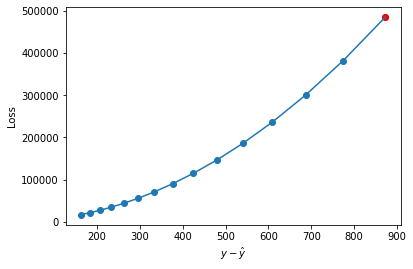

In [166]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()

**Conclusions**

*By choosing the learning rate to be a = 0.1, we have the optimal hyperparameter. This is because for each epoch - thus iteration the loss of the cost function minimizes well. Also by plotting the loss of the linear model with respect to the y-y^ we can see that the difference of predicted and actual values reach close to zero with a minimum loss*